In [2]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from src.rf import feature_selection_and_plot

In [3]:
#LOAD DATASETS
train = pd.read_csv('./data/derived/feature_selection/training_data.csv', index_col=0)
test = pd.read_csv('./data/derived/feature_selection/test_data.csv', index_col=0)
combined = pd.concat([train, test])

#DEFINE X AND Y
X_train = combined.drop(columns=['TSI_category', 'TSI_days', 'RENAME_ID'])
y_train = combined['TSI_category']

# Ordinally encode the target variable
tsi_order = ['0m-6m', '6m-12m', '12m-24m', '2y-4y', '4y+']
encoder = OrdinalEncoder(categories=[tsi_order])
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()

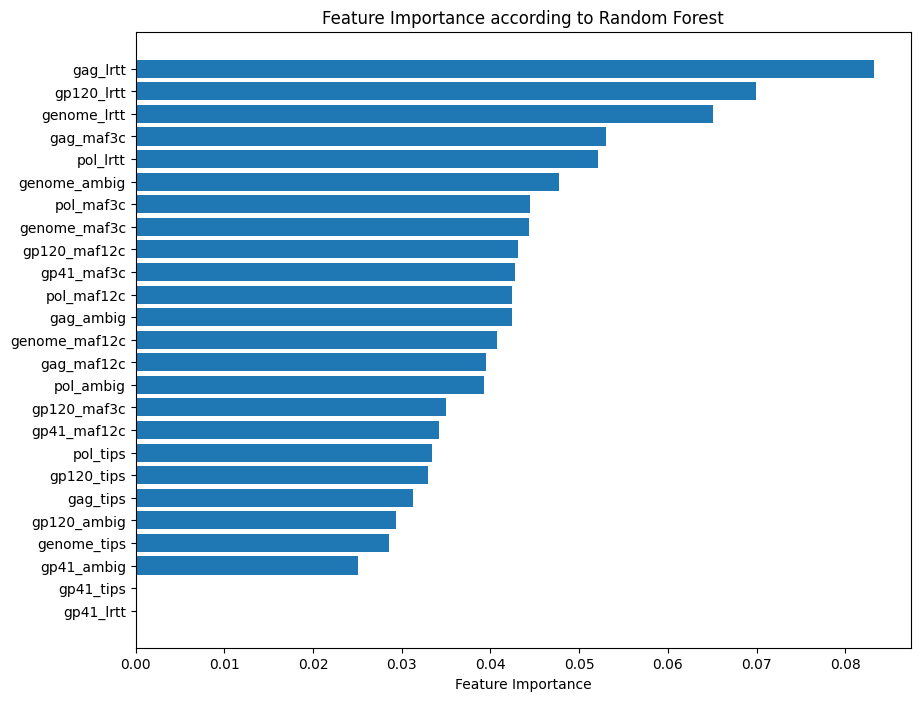

Complete set of features: ['genome_lrtt', 'genome_tips', 'gag_lrtt', 'gag_tips', 'pol_lrtt', 'pol_tips', 'gp120_lrtt', 'gp120_tips', 'gp41_lrtt', 'gp41_tips', 'genome_maf12c', 'genome_maf3c', 'gag_maf12c', 'gag_maf3c', 'pol_maf12c', 'pol_maf3c', 'gp120_maf12c', 'gp120_maf3c', 'gp41_maf12c', 'gp41_maf3c', 'genome_ambig', 'gag_ambig', 'pol_ambig', 'gp41_ambig', 'gp120_ambig']
Selected features: ['genome_lrtt', 'gag_lrtt', 'gag_tips', 'pol_lrtt', 'pol_tips', 'gp120_lrtt', 'gp120_tips', 'genome_maf12c', 'genome_maf3c', 'gag_maf12c', 'gag_maf3c', 'pol_maf12c', 'pol_maf3c', 'gp120_maf12c', 'gp120_maf3c', 'gp41_maf12c', 'gp41_maf3c', 'genome_ambig', 'gag_ambig', 'pol_ambig']


In [4]:
selected_features = feature_selection_and_plot(X_train, y_train_encoded, model_type= RandomForestClassifier, output_path= './outputs/features/feature_importance_multiclass.png')

In [5]:
len(selected_features)

20